In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import BSpline

In [2]:
# import data
data = pd.read_csv('pop_total.csv')
data.head()

,Year,Afghanistan,Angola,Arab World,Argentina,Australia,Belgium,Burkina Faso,Bangladesh,Brazil,...,Upper middle income,United States,Uzbekistan,"Venezuela, RB",Vietnam,World,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2001,0.043432,0.032987,0.021204,0.011173,0.013575,0.003445,0.029001,0.019197,0.014052,...,0.008575,0.009947,0.012740,0.018790,0.010641,0.012980,0.028835,0.014361,0.027813,0.011775
2,2002,0.093868,0.068836,0.042964,0.022449,0.026022,0.007954,0.059025,0.038147,0.027745,...,0.016691,0.019360,0.025211,0.037584,0.020812,0.025915,0.058432,0.028382,0.055947,0.022768
3,2003,0.147862,0.107199,0.065541,0.033783,0.038762,0.012182,0.090169,0.056526,0.041044,...,0.024656,0.028159,0.037210,0.056361,0.030667,0.038886,0.088805,0.041996,0.084583,0.033680
4,2004,0.200322,0.147485,0.089243,0.045099,0.050875,0.016572,0.122556,0.073918,0.053916,...,0.032514,0.037719,0.049247,0.075092,0.040382,0.051948,0.119853,0.055088,0.113997,0.045430


In [3]:
data.iloc[:, 1:].describe()

,Afghanistan,Angola,Arab World,Argentina,Australia,Belgium,Burkina Faso,Bangladesh,Brazil,Canada,...,Upper middle income,United States,Uzbekistan,"Venezuela, RB",Vietnam,World,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,...,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.384411,0.369371,0.218771,0.096418,0.129557,0.052576,0.300509,0.133816,0.103206,0.090757,...,0.068709,0.079333,0.138416,0.156166,0.090073,0.113162,0.276887,0.114880,0.280346,0.142594
std,0.236461,0.256982,0.147772,0.061132,0.090540,0.038244,0.206273,0.076821,0.060538,0.060496,...,0.043436,0.048365,0.102526,0.096338,0.059437,0.072266,0.183507,0.074076,0.195161,0.112145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212164,0.157929,0.095499,0.047911,0.054365,0.017974,0.130985,0.077953,0.057024,0.042397,...,0.034481,0.040121,0.052316,0.079757,0.042815,0.055236,0.127767,0.058222,0.121603,0.048755
50%,0.376009,0.347521,0.211933,0.095350,0.120997,0.048968,0.284932,0.137170,0.106396,0.086692,...,0.067468,0.082471,0.117024,0.158286,0.085333,0.112109,0.268028,0.108536,0.260012,0.119641
75%,0.566308,0.567600,0.337422,0.144955,0.202395,0.087310,0.459979,0.194017,0.152088,0.139170,...,0.102820,0.118192,0.222131,0.233716,0.136397,0.170240,0.421545,0.171596,0.428124,0.224700
max,0.768215,0.811589,0.460342,0.194660,0.284491,0.110342,0.653470,0.251468,0.193971,0.192995,...,0.139497,0.152340,0.313861,0.305808,0.190012,0.230071,0.580467,0.240307,0.623186,0.352444


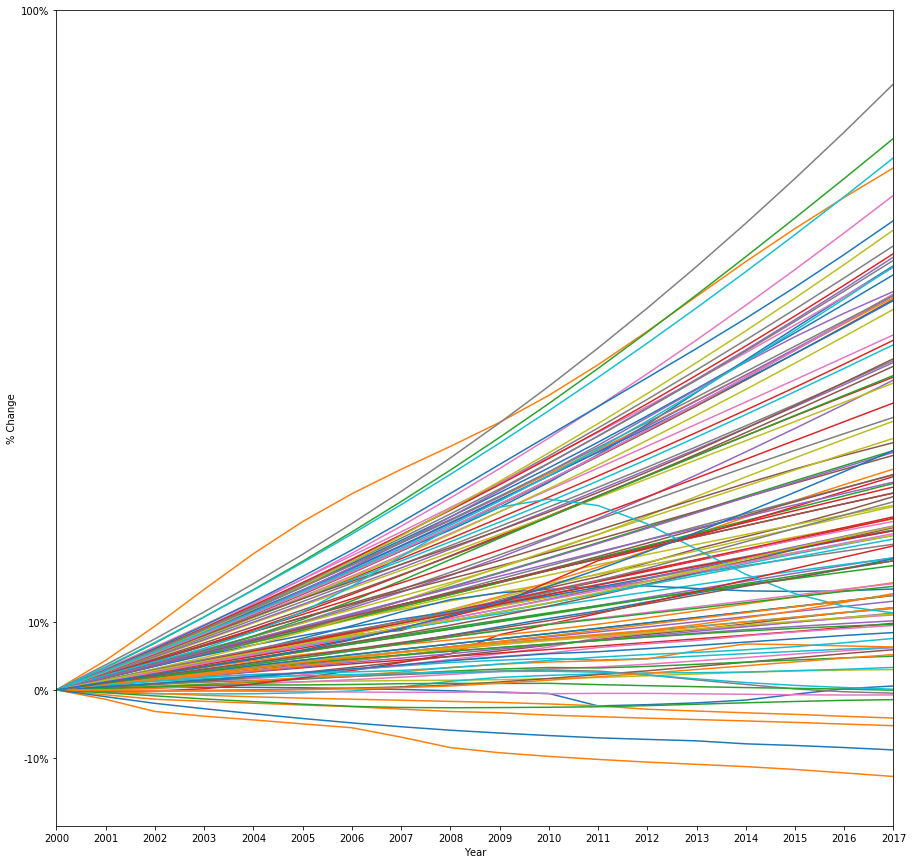

In [4]:
# lineplot of percentage changes for total population
years_str = data['Year']
years = [int(val) for val in years_str]

fig1, ax = plt.subplots(figsize=(15, 15))

for col in data:
    y = data[col] * 100
    ax.plot(years, y, label=col)

ax.set_xlabel('Year')
ax.set_xticks(years)
ax.set_xticklabels(years)
ax.set_xlim([min(years), max(years)])

#ax.set_yscale('symlog')
ax.set_ylabel('% Change')
ax.set_yticks([-10, 0, 10, 100])
ax.set_yticklabels(["-10%", "0%", "10%", "100%"])
ax.set_ylim([-20, 100])

plt.show()

In [16]:
print(data['Afghanistan'])

0     0.000000
1     0.043432
2     0.093868
3     0.147862
4     0.200322
5     0.247691
6     0.288632
7     0.324630
8     0.358334
9     0.393683
10    0.433439
11    0.478499
12    0.527686
13    0.579182
14    0.630259
15    0.678954
16    0.724716
17    0.768215
Name: Afghanistan, dtype: float64
